# Lab 15
- Analiza koszykowa 
- Systemy rekomendacyjne

## Analiza koszykowa
Analiza koszykowa to dosłownie analiza koszyka zakupowego klienta w sklepie internetowym lub w sklepie stacjonarnym. Staramy się znaleźć reguły zakupowe i powiązania między produktami, tak aby usprawnić sprzedaż.

W czym może to pomóć?
- Optymalizacja rozkładu produktów na półkach
- Sprzedaż akcesoriów do danego produktu np. laptopa
![image.png](./fig/basket_sample.png)
- Personalizowane kampanie marketingowe po dokonaniu jakiś zakupów

### Algorytm Apriori
Algorytm pozwalający w bardzo prosty sposób wyciągnąć dużo informacji o regułach zakupowych ze zbioru danych zawierającego transakcje klientów. Jego głównym założeniem jest to że jeżeli zbiór produktów jest "częsty" to dowolny podzbiór tych produktów również musi często występować. Aby zrozumieć jak działa przedstawimy sobie przykład:

Zbiór 6 transakcji dokonanych w sklepie spożywczym:

| Transaction ID | Jajka | Mleko | Mąka | Śmietana |
|----------------|-------|-------|------|----------|
| 1              | 1     | 1     | 0    | 1        |
| 2              | 0     | 0     | 1    | 0        |
| 3              | 0     | 0     | 1    | 0        |
| 4              | 0     | 1     | 1    | 0        |
| 5              | 1     | 1     | 1    | 0        |
| 6              | 1     | 0     | 0    | 1        |

#### Support
Domyślna "popularność" produktu lub zbioru produktów w danym sklepie.

$$supp(A) = \frac{\text{# transakcji z A}}{\text{# wszystkich transakcji}}$$

$supp({Jajka}) = \frac{3}{5} = 0.6$

$supp({Mleko}) = \frac{3}{5} = 0.6$

$supp({Mąka}) = \frac{4}{5} = 0.8$

$supp({Śmietana}) = \frac{2}{5} = 0.4$

$supp({Jajka,Mleko}) = \frac{2}{5} = 0.4$

$supp({Mleko,Mąka, Śmietana}) = \frac{0}{5} = 0$

####  Confidence
Prawdopodobieństwo że klient który kupił produkt A, kupi też produkt B.

$$conf(A \rightarrow B) = \frac{\text{# transakcji zawierających A i B}}{\text{# transakcji z A}}$$

$supp({Jajka} \rightarrow {Mleko}) = \frac{2}{3} = 0.67$

$supp({Mąka} \rightarrow {Mleko}) = \frac{2}{4} = 0.5$

$supp({Mleko} \rightarrow {Mąka}) = \frac{2}{3} = 0.67$

$supp({Mleko, Jajka} \rightarrow {Mąka}) = \frac{1}{2} = 0.5$

#### Lift
Procentowe zwiększenie sprzedaży produktu A kiedy sprzedajemy też B. "Prawdopodobieństwo" że klient kupi A i B razem jest LIFT razy większe niż kupienie produktów A i B osobno.

$$LIFT(A \rightarrow B) = \frac{conf(A \rightarrow B)}{supp(B)}$$

- $LIFT = 1$ - nie ma reakcji dla tych produktów
- $LIFT > 1$ - pozytywna korelacja, produkty A i B są cześciej kupowane razem
- $LIFT < 1$ - negatywna koerlacja, produkty A i B nie są kupowane razem

$LIFT({Jajka}\rightarrow {Mleko}) = \frac{0.67}{0.6} = 1.12$

$LIFT({Mąka}\rightarrow {Mleko}) = \frac{0.5}{0.6} = 0.83$

$LIFT({Mleko} \rightarrow {Mąka}) = \frac{0.67}{0.8} = 0.84$

$LIFT({Mleko, Jajka} \rightarrow {Mąka}) = \frac{0.5}{0.4} = 1.25$

#### Działanie algorytmu
1. Policzenie supportu dla wszystkich podzbiorów produktów **- mocno wymagające obliczeniowo - cały zbiór danych**.
2. Wygenerowanie listy częstych podzbiorów z $supp > supp\_threshold$.
3. Policzenie confidence dla wszystkich częstych podzbiorów produktów.
4. Wygenerowanie listy częstych podzbiorów z confidence $conf > conf\_threshold$.

Jak można poradzić sobie ze złożonością obliczeniową?
- wykorzystanie głównego założenia algorytmu o częstości występowania podzbiorów
![image.png](https://miro.medium.com/max/1400/0*lRpX-OdvnrK3pQyu.png)
- usunięcie transakcji nie zawierających "częstych" produktów
- partycjonowanie/samplowanie bazy danych

#### Przykładowe dane

In [94]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
data = pd.read_csv('transactions.csv', header = None)

# let's check the shape of the dataset
data.shape

(7501, 20)

In [96]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


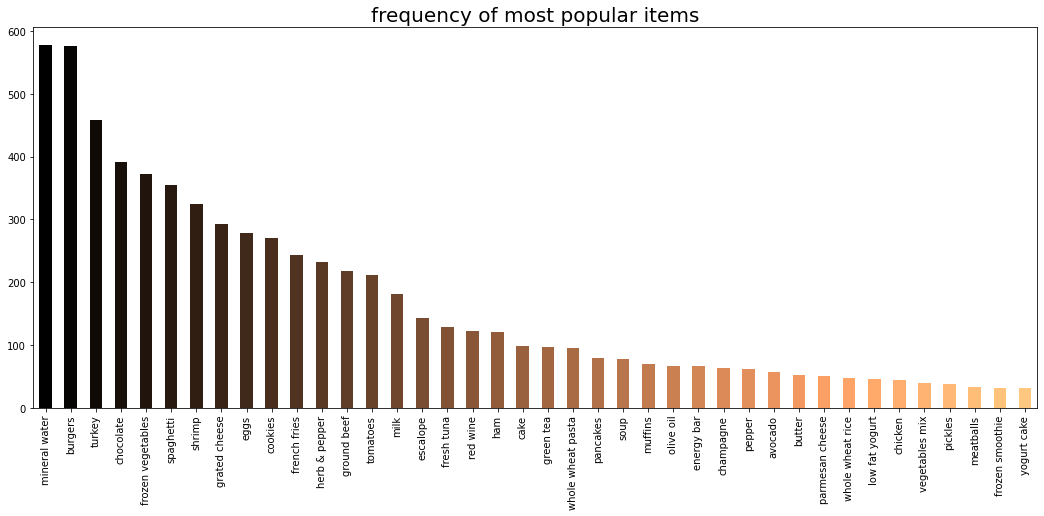

In [97]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.show()

/home/kaketo/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


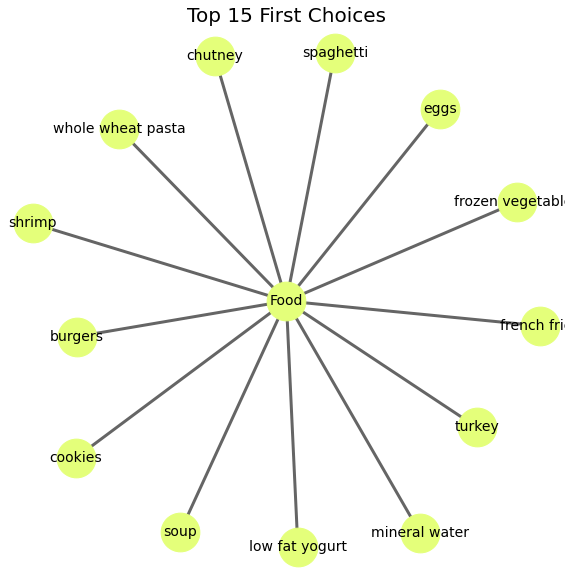

In [98]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

plt.rcParams['figure.figsize'] = (10, 10)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 1500, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 14, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

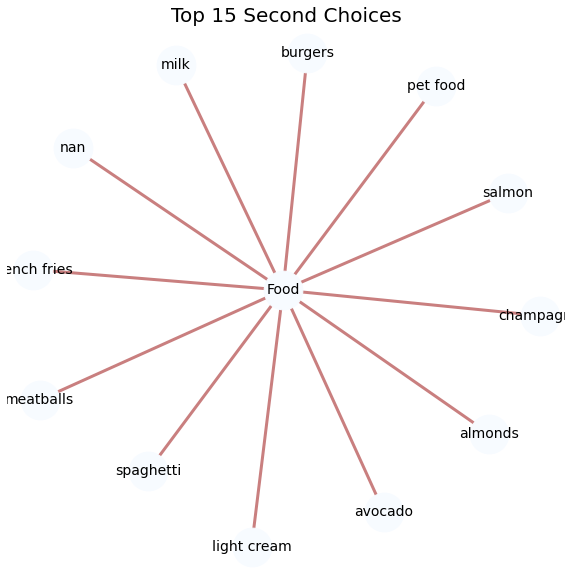

In [99]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

plt.rcParams['figure.figsize'] = (10, 10)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 1500, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 14, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 20)
plt.show()

##### biblioteka apyori

In [100]:
from apyori import apriori

In [101]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [102]:
trans

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [103]:
rules = apriori(trans, 
                min_support = 0.055, 
                min_confidence = 0.2,
                min_lift = 1.1, 
                min_length = 4)

rules = list(rules)
rules

[RelationRecord(items=frozenset({'spaghetti', 'mineral water'}), support=0.05972536995067324, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mineral water'}), items_add=frozenset({'spaghetti'}), confidence=0.2505592841163311, lift=1.4390851379453289), OrderedStatistic(items_base=frozenset({'spaghetti'}), items_add=frozenset({'mineral water'}), confidence=0.3430321592649311, lift=1.4390851379453289)]),
 RelationRecord(items=frozenset({'spaghetti', 'mineral water', 'nan'}), support=0.05972536995067324, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mineral water'}), items_add=frozenset({'spaghetti', 'nan'}), confidence=0.2505592841163311, lift=1.4390851379453289), OrderedStatistic(items_base=frozenset({'spaghetti'}), items_add=frozenset({'mineral water', 'nan'}), confidence=0.3430321592649311, lift=1.439890445800922), OrderedStatistic(items_base=frozenset({'mineral water', 'nan'}), items_add=frozenset({'spaghetti'}), confidence=0.2506994963626189, lift=1.4398904

In [104]:
rules[0]

RelationRecord(items=frozenset({'spaghetti', 'mineral water'}), support=0.05972536995067324, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mineral water'}), items_add=frozenset({'spaghetti'}), confidence=0.2505592841163311, lift=1.4390851379453289), OrderedStatistic(items_base=frozenset({'spaghetti'}), items_add=frozenset({'mineral water'}), confidence=0.3430321592649311, lift=1.4390851379453289)])

In [115]:
rules[0].items, rules[0].support

(frozenset({'mineral water', 'spaghetti'}), 0.05972536995067324)

##### biblioteka mlxtend

In [119]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
trans2 = te.fit_transform(trans)
trans2 = pd.DataFrame(trans2, columns = te.columns_)

# getting the shape of the data
trans2.shape

(7501, 121)

In [120]:
trans2 = trans2.drop(['nan'], axis=1)
trans2

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [125]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
rules2 = apriori(trans2, min_support = 0.05, use_colnames = True)

rules2['length'] = rules2['itemsets'].apply(lambda x: len(x))
rules2.sort_values(['support'], ascending=False)

,support,itemsets,length
16,0.238368,(mineral water),1
6,0.179709,(eggs),1
21,0.174110,(spaghetti),1
8,0.170911,(french fries),1
3,0.163845,(chocolate),1
12,0.132116,(green tea),1
15,0.129583,(milk),1
13,0.098254,(ground beef),1
10,0.095321,(frozen vegetables),1
18,0.095054,(pancakes),1


In [126]:
rules2[(rules2['length'] == 2) &
                   (rules2['support'] >= 0.01) ]

,support,itemsets,length
25,0.052660,"(mineral water, chocolate)",2
26,0.050927,"(eggs, mineral water)",2
27,0.059725,"(spaghetti, mineral water)",2


## Systemy rekomendacyjne
Są to mechanizmy używane przez sklepy, dzięki którym klient, który odwiedza sklep internetowy, otrzymuje spersonalizowane zachęty zakupowe. Dzieje się tak, ponieważ silnik rekomendacji analizuje zachowania użytkownika w sieci: przeglądane strony i produkty, jakimi był zainteresowany.

W czym może to pomóć?
- Presonalizowane mailingi.
- Klient otrzymuje oferty produktów o których nie wiem, a które potrzebuje.

![image.png](./fig/reco_groups.png)

### Content - Based
![image.png](./fig/content_reco_1.png)
![image.png](./fig/content_reco_2.png)

### Collaborative Filtering
![image.png](./fig/colla_reco_1.png)
![image.png](./fig/colla_reco_2.png)
![image.png](./fig/colla_reco_3.png)

### Wady i zalety poszczególnych systemów
##### Content-Based
- rekomendacje są bardziej trafne i podobne do naszych upodobań
- możemy rekomendować tylko kategorie np. filmów które już oglądaliśmy. Nie polecimy filmu animowanego osobie która nigdy żadnego nie oceniła
- problem z nowymi użytkownikami "cold start"

##### Collaborative Filtering
- Wymagana ogromna ilośc RAM do przechowania macierzy ocen (dużo NULLi)
- problem z nowymi użytkownikami "cold start"
- skalowalność wraz ze wzrostem liczby użytkowników

## Źródła
https://towardsdatascience.com/market-basket-analysis-978ac064d8c6

https://www.kaggle.com/roshansharma/market-basket-analysis

https://www.kdnuggets.com/2019/11/content-based-recommender-using-natural-language-processing-nlp.html